In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
df.shape


(100, 4)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB




# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
     

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt



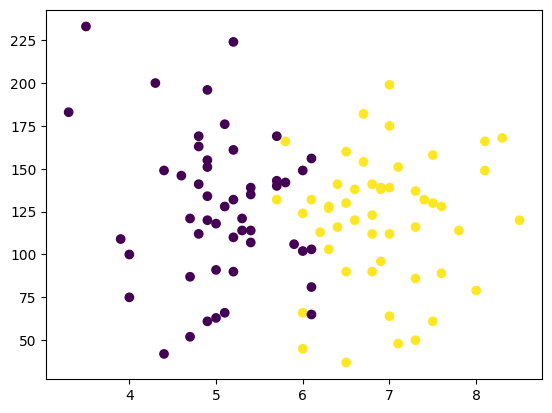

In [ ]:
plt.scatter(df['cgpa'],df['iq'] , c = df['placement'])

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train ,Y_test =  train_test_split(X,Y,test_size = 0.1)

In [ ]:
X_train

,cgpa,iq
63,6.3,128.0
1,5.9,106.0
79,6.5,90.0
91,7.5,158.0
33,6.0,149.0
...,...,...
60,6.9,139.0
67,5.0,118.0
84,5.7,169.0
0,6.8,123.0


In [ ]:
X_test

,cgpa,iq
55,7.8,114.0
18,4.0,100.0
9,5.1,66.0
97,6.7,182.0
27,6.0,124.0
5,7.1,48.0
94,4.7,52.0
20,6.6,120.0
92,5.2,110.0
45,6.0,66.0


In [ ]:
Y_train

63    1
1     0
79    1
91    1
33    0
     ..
60    1
67    0
84    0
0     1
44    1
Name: placement, Length: 90, dtype: int64

In [ ]:
Y_test

55    1
18    0
9     0
97    1
27    1
5     1
94    0
20    1
92    0
45    1
Name: placement, dtype: int64

## Now we scale a value

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 2.64035628e-01,  4.12328531e-02],
       [-8.67128078e-02, -5.25718877e-01],
       [ 4.39409846e-01, -9.38047407e-01],
       [ 1.31628094e+00,  8.14348848e-01],
       [ 9.74301211e-04,  5.82414050e-01],
       [ 2.64035628e-01,  1.54623199e-02],
       [-1.84045499e+00, -4.48407277e-01],
       [-9.63583898e-01,  1.79362911e+00],
       [-1.22664522e+00,  5.05102450e-01],
       [-7.00522571e-01,  2.51520404e+00],
       [ 9.74301211e-04, -6.28801009e-01],
       [-1.40201944e+00,  5.82414050e-01],
       [-2.62087026e-01,  4.27790851e-01],
       [ 2.19315203e+00, -1.64931412e-01],
       [-1.48970655e+00,  1.89671124e+00],
       [-2.36657764e+00,  1.45861218e+00],
       [ 7.02471173e-01, -9.38047407e-01],
       [-1.75276788e+00, -1.32460541e+00],
       [-2.62087026e-01,  1.44314986e-01],
       [ 6.14784064e-01,  7.11266716e-01],
       [ 1.40396805e+00,  4.12328531e-02],
       [ 1.84240359e+00,  5.82414050e-01],
       [-8.75896789e-01, -9.12276874e-01],
       [ 8.

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 1.57934226e+00, -3.19554611e-01],
       [-1.75276788e+00, -6.80342076e-01],
       [-7.88209680e-01, -1.55654020e+00],
       [ 6.14784064e-01,  1.43284164e+00],
       [ 9.74301211e-04, -6.18492796e-02],
       [ 9.65532500e-01, -2.02040980e+00],
       [-1.13895812e+00, -1.91732767e+00],
       [ 5.27096955e-01, -1.64931412e-01],
       [-7.00522571e-01, -4.22636744e-01],
       [ 9.74301211e-04, -1.55654020e+00]])

## Now we can train model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## now we can create clf object which is contained all funcationallty of logisticregression
clf = LogisticRegression()

In [ ]:
## model train
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_test

55    1
18    0
9     0
97    1
27    1
5     1
94    0
20    1
92    0
45    1
Name: placement, dtype: int64

## now we can check our model accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8

## Decision regions in 2D

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

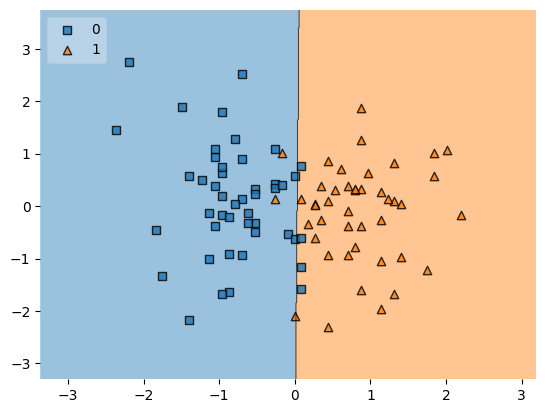

In [ ]:
# Plotting decision regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('Model.pkl','wb'))